In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydot

from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import export_graphviz

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, \
r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_squared_log_error, explained_variance_score

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## EVALUATION PARAMETERS

In [ ]:
TREE_DEPTH = 3

In [2]:
def compare_values(y_true, y_pred, target):
        
    tr = pd.DataFrame(data=y_true, columns=[target])
    pr = pd.DataFrame(data=y_pred, columns=[target])


    fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,6))

    sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
    sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)


    fig.suptitle('True vs Predicted Comparison', fontsize=20)

    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    ax[0].set_title("True values", fontsize=18)
    ax[1].set_title("Predicted values", fontsize=18)
    plt.show()

# Read and clean dataset

In [3]:
# read
df = pd.read_csv("spotify-dataset.csv")

# lower the attribute
df['Top Genre'] = (df["Top Genre"].str.strip()).str.lower()

# drop genres that have less than 20 instances
to_remove = [genre for genre in df['Top Genre'].unique() if df['Top Genre'].value_counts()[genre] < 20] 
for r in to_remove:
    df = df[df['Top Genre'] != r]

# convert negative values to positive, because the percenption of sound is relative (-N dB == N dB in human ear)
df['Loudness (dB)'] = df['Loudness (dB)'].abs()

# convert duration to int
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'].str.replace(',',''))

# drop not used columns
df.drop(columns = ['Index', 'Title', 'Artist', 'Year'], inplace=True)

# encode genres
genres = list(df['Top Genre'].unique())
df['Top Genre Encoded'] = df['Top Genre'].apply(lambda x: genres.index(x))

In [4]:
df

,Top Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Top Genre Encoded
0,adult standards,157,30,53,14,11,68,201,94,3,71,0
1,album rock,135,79,50,11,17,81,207,17,7,39,1
3,alternative metal,173,96,43,4,3,37,269,0,4,76,2
4,classic rock,106,82,58,5,10,87,256,1,3,59,3
6,pop,102,71,71,6,13,54,257,6,3,74,4
7,modern rock,137,96,37,5,12,21,366,0,14,69,5
8,modern rock,148,92,36,4,10,23,223,0,8,77,5
10,adult standards,109,5,44,16,11,31,162,88,4,49,0
11,alternative rock,124,46,74,8,26,32,232,1,8,74,6
12,dutch indie,102,88,54,6,53,59,214,2,3,34,7


# Perform analysis

The analisis performed, conssits in a classification with random forest, that ....

### Prepare data

In [5]:
targets = ['Top Genre Encoded']
features = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']
X = df[features]
Y = df[targets]
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=1)

### Train model

In [6]:
model = RandomForestClassifier(max_depth = TREE_DEPTH , random_state=1, n_estimators=10)
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Perform validation predictions

In [7]:
validation_predictions = model.predict(test_X)

In [8]:
validation_predictions

array([ 1,  0,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [9]:
labels = test_y['Top Genre Encoded'].tolist()

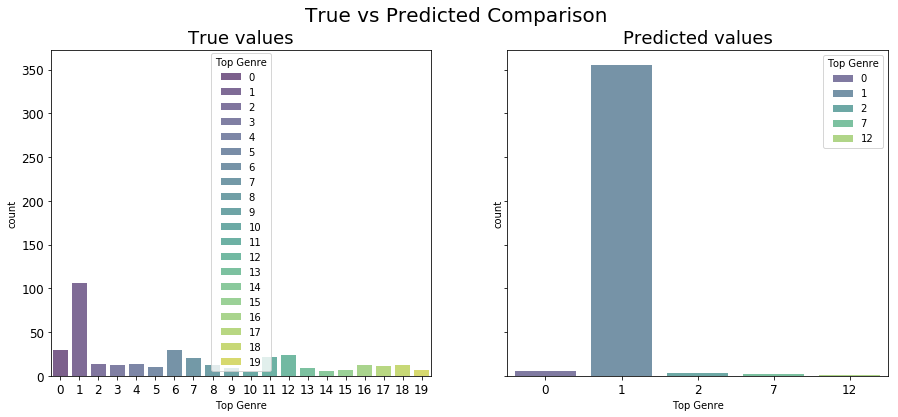

In [10]:
# Visualize labels in test data versus predictions and number of 
# equivalente values
compare_values(labels, validation_predictions, 'Top Genre')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f987c2c0950>,
      dtype=object)

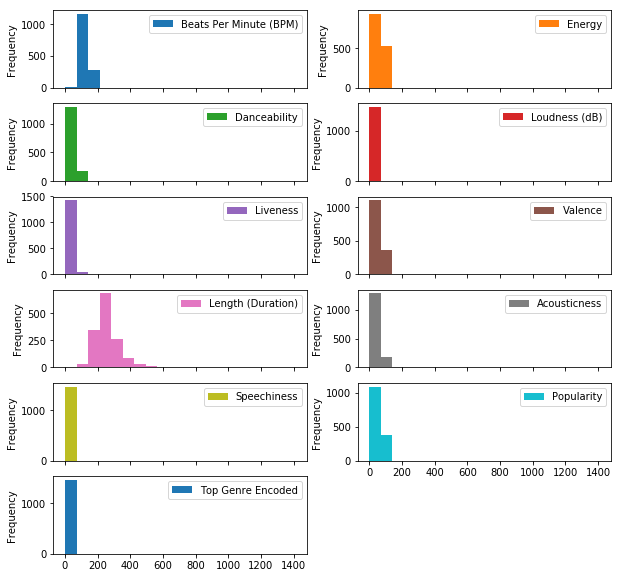

In [11]:
# Representation of value frequency
df.plot.hist(subplots=True, layout=(6,2), figsize=(10, 10), bins=20)

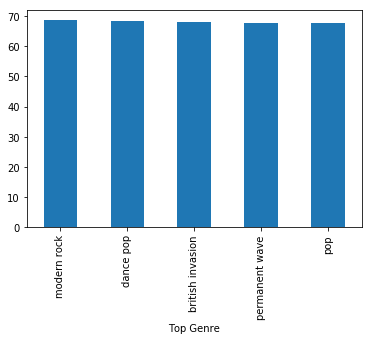

In [12]:
# Values of Popularity for each genre
df.groupby("Top Genre").Popularity.mean().sort_values(ascending=False)[:5].plot.bar()

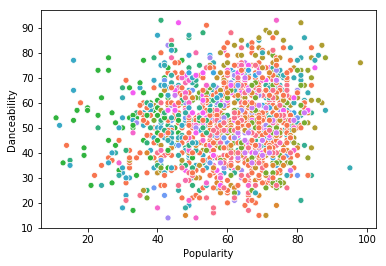

In [13]:
# Scatter of Popularity - Danceability
g = sns.scatterplot(x='Popularity', y='Danceability', hue='Top Genre', data=df, legend=False)

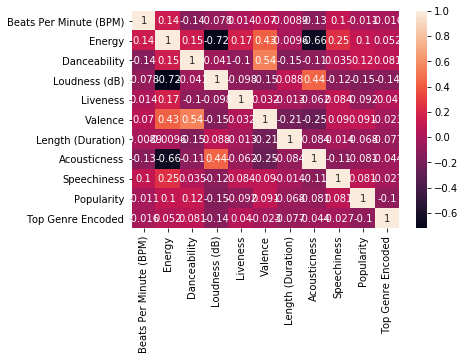

In [14]:
# Confusion matrix
sns.heatmap(df.drop(['Top Genre'], axis=1).corr(), annot=True)

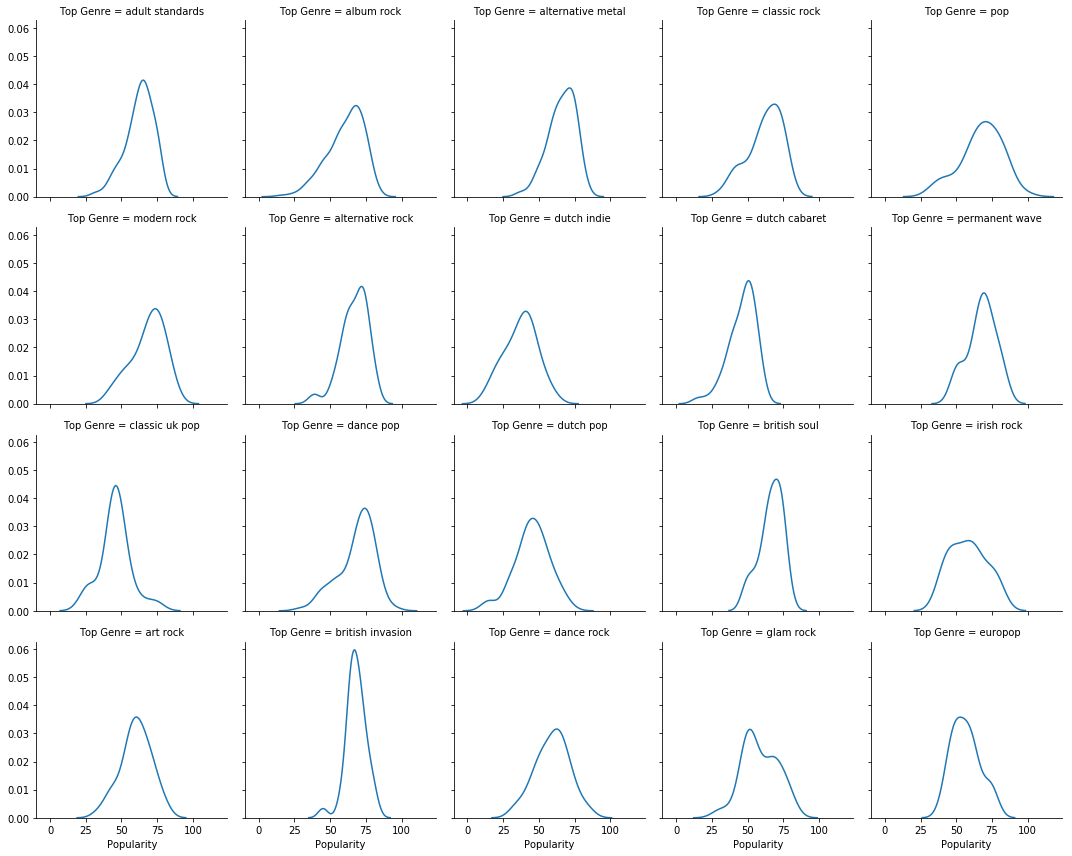

In [15]:
# Faceting is the act of breaking data variables up across multiple subplots 
# and combining those subplots into a single figure.
# In this case it will be the points of P1 per floor
g = sns.FacetGrid(df, col='Top Genre', col_wrap=5)
g = g.map(sns.kdeplot, 'Popularity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9879aa7150>,
      dtype=object)

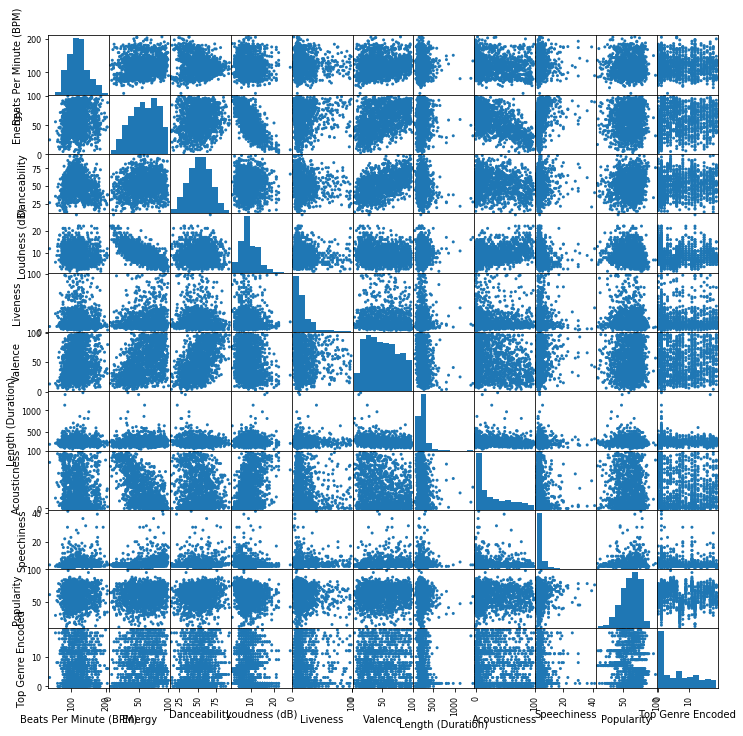

In [16]:
# Sparse matrix
fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(df.drop(['Top Genre'], axis=1), alpha=1, ax=ax)

# Plot model statistics

In [17]:
r2 = r2_score(test_y, validation_predictions)
mse = mean_squared_error(test_y, validation_predictions) 
mean_absolute_error = mean_absolute_error(test_y, validation_predictions) 
explained_variance = explained_variance_score(test_y, validation_predictions)
median_absolute_error = median_absolute_error(test_y, validation_predictions)
mean_squared_log_error = mean_squared_log_error(test_y, validation_predictions)

print('r2:',{round(r2,4)})
print('MSE:',{round(mse,4)})
print('RMSE:',{round(np.sqrt(mse),4)})
print('MAE:',{round(mean_absolute_error,4)})
print('explained_variance:',{round(explained_variance,4)})    
print('mean_squared_log_error:',{round(mean_squared_log_error,4)})

('r2:', set([-0.8387]))
('MSE:', set([62.5313]))
('RMSE:', set([7.9077]))
('MAE:', set([5.5504]))
('explained_variance:', set([0.006]))
('mean_squared_log_error:', set([1.7341]))


In [18]:
cross_val_score_ = cross_val_score(model, train_X, train_y, cv = 10, scoring = 'accuracy')
print(f'cross validation mean {cross_val_score_.mean()}')
print(f'cross validation std  {cross_val_score_.std()}')

SyntaxError: invalid syntax (<ipython-input-18-555e12d0112d>, line 2)

In [ ]:
y_randforest = cross_val_predict(model, train_X, train_y, cv = 10)
recall_score_ = recall_score(train_y, y_randforest, average = "micro")
precission_score_ = precision_score(train_y, y_randforest, average = "micro")
f1_score = 2 * (precission_score_ * recall_score_) / (precission_score_ + recall_score_)
print(f'Recall Score:',{recall_score_})
print(f'Precision Score:',{precission_score_})
print(f'F1 Score:', {f1_score})

### Tree Visualization

In [19]:
# Extract single tree
estimator = model.estimators_[5]

In [20]:
column_names = list(df[features].columns.values)
class_names = list(df['Top Genre'].unique())

In [21]:
column_names

['Beats Per Minute (BPM)',
 'Energy',
 'Danceability',
 'Loudness (dB)',
 'Liveness',
 'Valence',
 'Length (Duration)',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [22]:
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = column_names,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

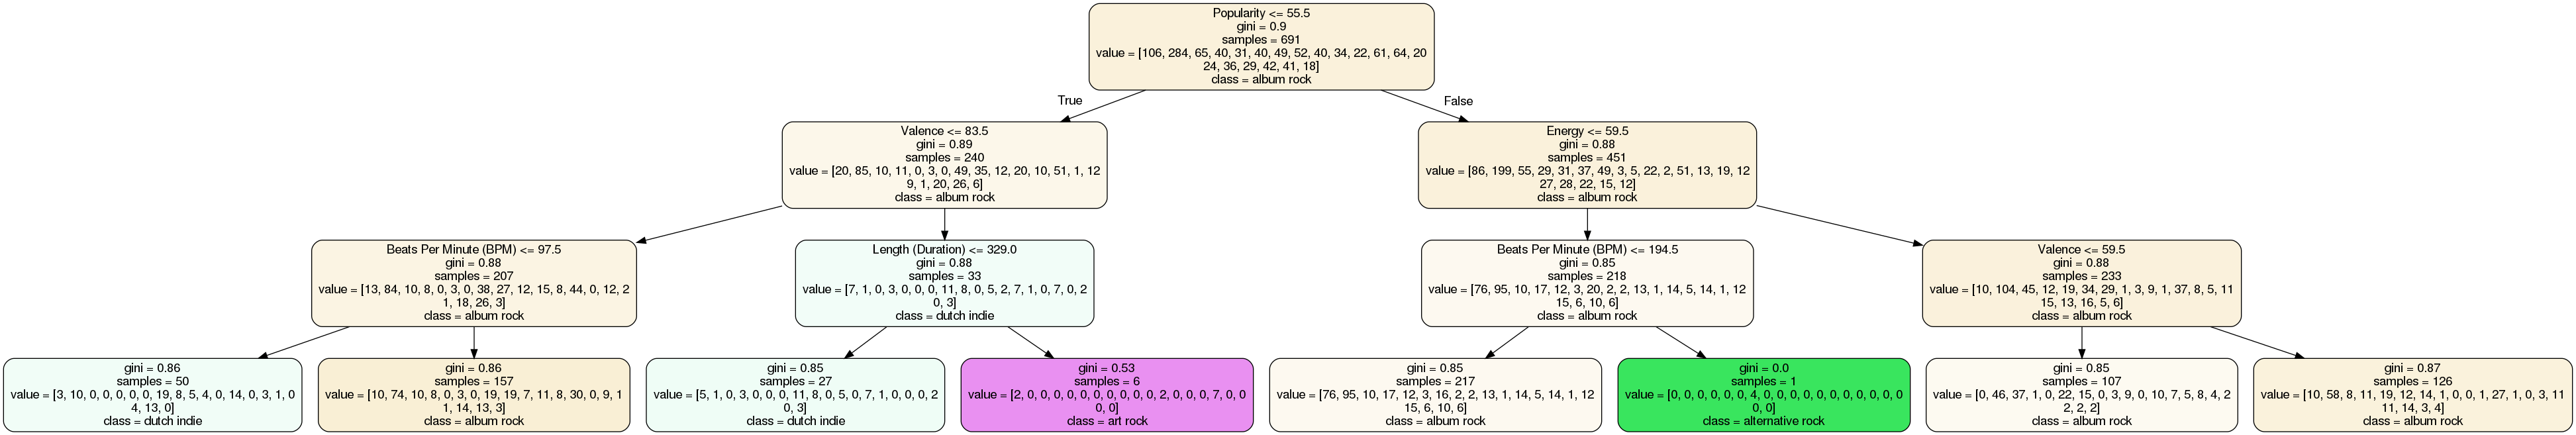

In [23]:
# Convert to png using system command (requires Graphviz)
# python -m pip install graphviz
# python -m pip install pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display in jupyter notebook
Image(filename = 'tree.png')